# Pytorch Custom Datasets

# import pytorch  and setting up device agnostic code

In [1]:
import torch
from torch import nn

In [2]:

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Get data

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "dog_breeds1"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "dogsbreed3.zip", "wb") as f:
        request = requests.get("https://github.com/yuvrajkari7/Dog-breed-check/raw/main/dogbreed3.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "dogsbreed3.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)





data/dog_breeds1 directory exists.


# becoming one with the data

In [6]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames,filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directoriries and {len(filenames)} image in {dirpath}")

In [7]:
walk_through_dir(image_path)

there are 1 directoriries and 0 image in data/dog_breeds1
there are 2 directoriries and 0 image in data/dog_breeds1/dogbreed
there are 2 directoriries and 0 image in data/dog_breeds1/dogbreed/train
there are 0 directoriries and 130 image in data/dog_breeds1/dogbreed/train/Pit Bull
there are 0 directoriries and 98 image in data/dog_breeds1/dogbreed/train/Rottweiler
there are 2 directoriries and 0 image in data/dog_breeds1/dogbreed/test
there are 0 directoriries and 10 image in data/dog_breeds1/dogbreed/test/Pit Bull
there are 0 directoriries and 10 image in data/dog_breeds1/dogbreed/test/Rottweiler


In [8]:
# setup train and test paths
train_dir=image_path / "train"
test_dir=image_path / "test"
train_dir, test_dir

(PosixPath('data/dog_breeds1/train'), PosixPath('data/dog_breeds1/test'))

# Visualize an image

Random image path: data/dog_breeds1/train/Rottweiler/55.jpg
Image class: Rottweiler
Image height: 224
Image width: 224


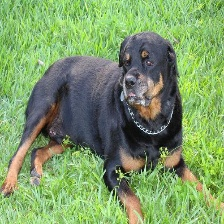

In [10]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

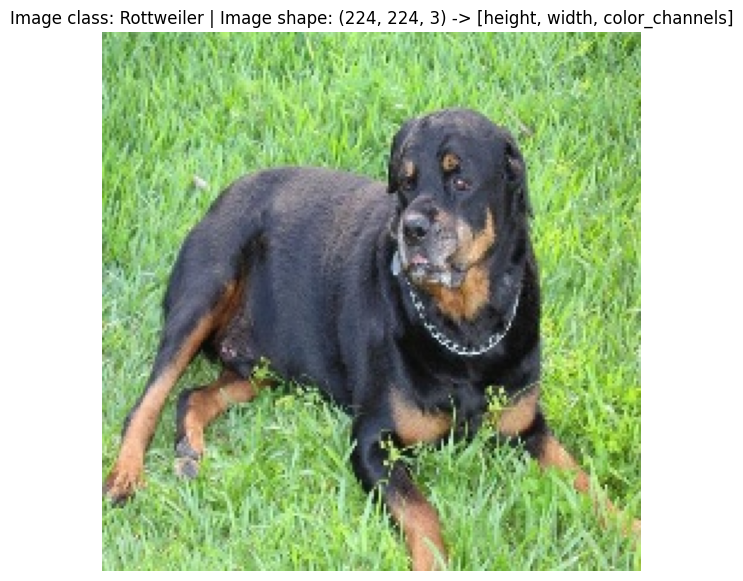

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [12]:
img_as_array

array([[[114, 165, 108],
        [115, 170, 102],
        [145, 205, 119],
        ...,
        [125, 176,  99],
        [118, 165,  93],
        [117, 164,  94]],

       [[107, 158,  99],
        [ 85, 140,  72],
        [171, 230, 146],
        ...,
        [114, 166,  84],
        [ 95, 143,  67],
        [ 96, 144,  68]],

       [[104, 156,  90],
        [108, 163,  95],
        [155, 213, 137],
        ...,
        [117, 170,  80],
        [109, 159,  72],
        [101, 151,  64]],

       ...,

       [[164, 211, 143],
        [192, 238, 173],
        [186, 232, 170],
        ...,
        [184, 226, 128],
        [198, 237, 120],
        [162, 199,  70]],

       [[142, 193, 118],
        [190, 240, 169],
        [194, 239, 180],
        ...,
        [174, 220, 121],
        [178, 221, 106],
        [161, 201,  78]],

       [[140, 193, 113],
        [166, 218, 144],
        [192, 237, 180],
        ...,
        [161, 209, 109],
        [174, 216, 104],
        [162, 203,  83]]

# transforming images into tensors
1.turn ur traget data into tensor
2. turn it into a torch.utils.Dataset and subsequently a torch.utils.data.Dataloader well call these dataset and dataloader

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transforming data with torchvision.transforms


In [14]:
# write a transform for image
data_transform = transforms.Compose([
    # resize our image to 64*64
    transforms.Resize(size=(64,64)),
    # flip the image
    transforms.RandomHorizontalFlip(p=0.5),

    # turn image to torch tensor
    transforms.ToTensor()
])

In [15]:
data_transform(img)

tensor([[[0.4902, 0.5529, 0.5529,  ..., 0.4510, 0.4824, 0.4275],
         [0.4980, 0.5098, 0.4980,  ..., 0.4471, 0.3843, 0.3843],
         [0.5137, 0.4863, 0.4863,  ..., 0.4510, 0.3882, 0.4745],
         ...,
         [0.6196, 0.5961, 0.6510,  ..., 0.5020, 0.5765, 0.6706],
         [0.6941, 0.6196, 0.6118,  ..., 0.5451, 0.5608, 0.6549],
         [0.6902, 0.6392, 0.5843,  ..., 0.5137, 0.5333, 0.6353]],

        [[0.7137, 0.7804, 0.7725,  ..., 0.6510, 0.6824, 0.6235],
         [0.7255, 0.7373, 0.7255,  ..., 0.6510, 0.5804, 0.5765],
         [0.7412, 0.7216, 0.7137,  ..., 0.6549, 0.5725, 0.6667],
         ...,
         [0.8000, 0.7882, 0.8196,  ..., 0.6510, 0.7373, 0.8039],
         [0.8588, 0.7961, 0.7804,  ..., 0.7098, 0.7412, 0.8275],
         [0.8706, 0.8118, 0.7686,  ..., 0.6941, 0.7059, 0.8000]],

        [[0.4275, 0.5020, 0.4824,  ..., 0.3490, 0.3216, 0.2980],
         [0.4549, 0.4824, 0.4157,  ..., 0.3255, 0.2157, 0.2667],
         [0.4745, 0.4353, 0.4000,  ..., 0.3451, 0.2902, 0.

# func to plot transorm images

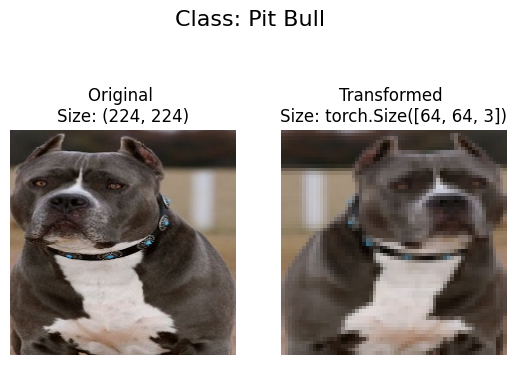

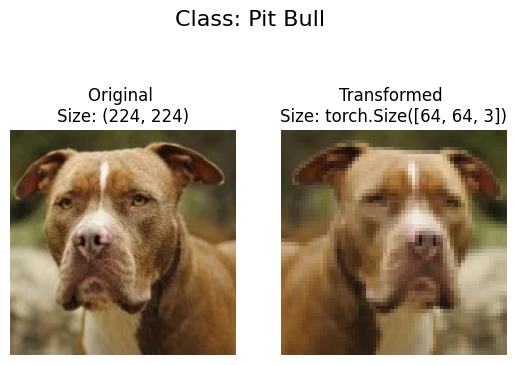

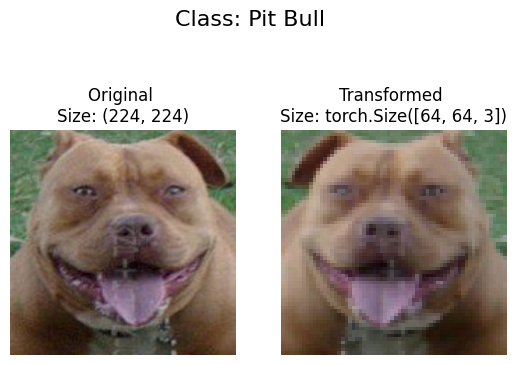

In [16]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3,seed=None)

# option 1 loading image data using ImageFolder

In [17]:
# use imagefolder to create dateses
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,#this is for the data
                                  target_transform=None
                                  )

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,#this is for the data
                                  target_transform=None
                                  )
train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 228
     Root location: data/dog_breeds1/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 20
     Root location: data/dog_breeds1/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
train_dir, test_dir

(PosixPath('data/dog_breeds1/train'), PosixPath('data/dog_breeds1/test'))

In [19]:
# get class names as list
class_names=train_data.classes
class_names

['Pit Bull', 'Rottweiler']

In [20]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'Pit Bull': 0, 'Rottweiler': 1}

In [21]:
# check the len of the dataset
len(train_data), len(test_data)

(228, 20)

In [22]:
train_data.samples[0]

('data/dog_breeds1/train/Pit Bull/001.jpg', 0)

In [23]:
# index on the train data dataset to get a single image and label

In [24]:
img, label=train_data[0][0],train_data[0][1]
print(f"image tensor:\n {img}")
print(f"image shape : {img.shape}")
print(f"image datatype: {img.dtype}")

print(f"label datatype: {type(label)}")

image tensor:
 tensor([[[0.3176, 0.5059, 0.6941,  ..., 0.8667, 0.7098, 0.6039],
         [0.3882, 0.3961, 0.5922,  ..., 0.8588, 0.7255, 0.6392],
         [0.5725, 0.4314, 0.4196,  ..., 0.7294, 0.7373, 0.7020],
         ...,
         [0.6863, 0.6784, 0.6039,  ..., 0.3412, 0.4000, 0.6471],
         [0.6353, 0.5647, 0.5490,  ..., 0.4039, 0.3765, 0.6039],
         [0.6824, 0.5333, 0.4627,  ..., 0.4353, 0.4000, 0.5020]],

        [[0.3137, 0.4824, 0.6667,  ..., 0.7647, 0.6431, 0.5882],
         [0.3961, 0.3804, 0.5686,  ..., 0.7843, 0.6863, 0.6471],
         [0.5765, 0.4157, 0.4000,  ..., 0.7020, 0.7333, 0.7176],
         ...,
         [0.8275, 0.8078, 0.8118,  ..., 0.4588, 0.5333, 0.7412],
         [0.8039, 0.7569, 0.7569,  ..., 0.5412, 0.5333, 0.7216],
         [0.8353, 0.7216, 0.6588,  ..., 0.5843, 0.5765, 0.6392]],

        [[0.2902, 0.4431, 0.6235,  ..., 0.5725, 0.4941, 0.5373],
         [0.3804, 0.3451, 0.5255,  ..., 0.6314, 0.6314, 0.6431],
         [0.5725, 0.3922, 0.3647,  ..., 0.6

In [25]:
class_names[label]

'Pit Bull'

og image shape: torch.Size([3, 64, 64])
og image shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'Pit Bull')

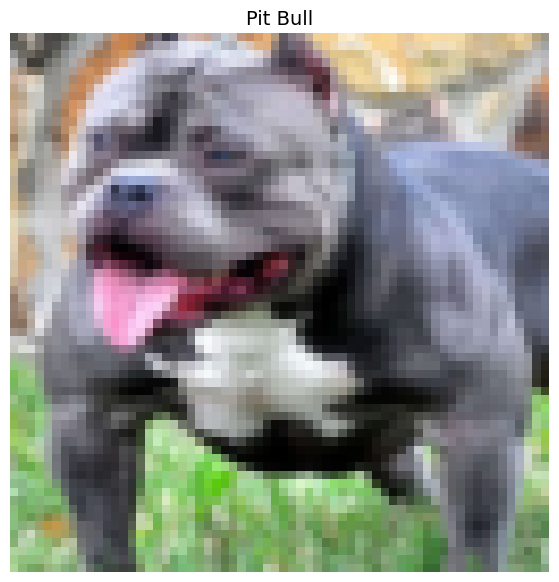

In [26]:
# to visualize we need to rearrange the dimesnsion because matplotlib needs HWC
img_permute = img.permute(1,2,0)


print(f"og image shape: {img.shape}")
print(f"og image shape: {img_permute.shape}")


# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)






In [27]:
import os
os.cpu_count()

2

# Turn loaded images into dataloader

a Dataloader is going to helop us turn our datasetw to iterable and we can customise the batchsize so our model can see batchsize images at a time

In [28]:
# turn train and test datasets into dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader=DataLoader(dataset=train_data,
                        batch_size=BATCH_SIZE,
                        num_workers=1,
                        shuffle=True


                        )
test_dataloader=DataLoader(dataset=test_data,
                        batch_size=BATCH_SIZE,
                        num_workers=1,
                        shuffle=False

                        )
train_dataloader, test_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x7dbab289bbe0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dbab289bac0>)

In [29]:
len(train_dataloader), len(test_dataloader)

(228, 20)

In [30]:
len(train_data), len(test_data)

(228, 20)

In [31]:
img, label=next(iter(train_dataloader))


print(f"image shape:{img.shape}") #batch size,c,H,W
print(f"label shape: {label.shape}")


image shape:torch.Size([1, 3, 64, 64])
label shape: torch.Size([1])


# creating a custom dataset dataloader

1. want to be able to load mage from file
2. want to be able to get class name from the dataset
3. want to be able to get classs as dict from the dataset


In [32]:
import torch
import os
import pathlib
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [33]:
train_data.classes, train_data.class_to_idx

(['Pit Bull', 'Rottweiler'], {'Pit Bull': 0, 'Rottweiler': 1})

# Creating a helper func to get class names
1.traverse throughthe directory
2.raise error if not found
3.get the class names into list and dict

In [34]:
target_directory = train_dir
print(f"the target Dir: {target_directory}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

the target Dir: data/dog_breeds1/train


['Pit Bull', 'Rottweiler']

In [35]:
list(os.scandir(target_directory))

[<DirEntry 'Pit Bull'>, <DirEntry 'Rottweiler'>]

In [36]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ this returns the class names"""

  # get the class names as a list
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # raises an error if calss names could not found
  if not classes:
    FileNotFoundError(f"couldnt find any class in {directory} plz check file structure")


  # create a dict of index labels
  class_to_idx = {class_name:i for i, class_name in enumerate(classes)}


  return classes, class_to_idx

In [37]:
find_classes(target_directory)

(['Pit Bull', 'Rottweiler'], {'Pit Bull': 0, 'Rottweiler': 1})

# Create a custom dataset to replicate imagefolder

steps:
1. Subclass torch.utils.data.Dataset.
Initialize our subclass with a targ_dir parameter (the target data directory) and transform parameter (so we have the option to transform our data if needed).
2. Create several attributes for paths (the paths of our target images), transform (the transforms we might like to use, this can be None), classes and class_to_idx (from our find_classes() function).
3. Create a function to load images from file and return them, this could be using PIL or torchvision.io (for input/output of vision data).
* Overwrite the __len__ method of torch.utils.data.Dataset to return the number of samples in the Dataset, this is recommended but not required. This is so you can call len(Dataset).
* Overwrite the __getitem__ method of torch.utils.data.Dataset to return a single sample from the Dataset, this is required.

In [39]:
# write a custom dataset
from torch.utils.data import Dataset

# subclass torch.utils...
class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir: str,
               transform: None):
    # create class attrib
    # get all image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform

    # create classee and class to idx
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # create a func to load images
  def load_images(self,index: int ) -> Image.Image:
    # opens a image via path and returns it
    image_path = self.paths[index]
    return Image.open(image_path)


#  overwrite len method
  def __len__(self) -> int:
    return len(self.paths)

  # overwrite getitem method
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    # returns 1 sample of data data and label
    img = self.load_images(index)
    class_name = self.paths[index].parent.stem #expects path in format: datafolder/classname/image.jpg
    class_idx = self.class_to_idx[class_name]

  # transform if neccesory
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx






In [40]:
from torchvision import transforms
# create a transform
train_transforms = transforms.Compose([
     # resize our image to 64*64
    transforms.Resize(size=(64,64)),
    # flip the image
    transforms.RandomHorizontalFlip(p=0.5),

    # turn image to torch tensor
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
     # resize our image to 64*64
    transforms.Resize(size=(64,64)),

    # turn image to torch tensor
    transforms.ToTensor()
])


In [41]:
# test our ImageFoldercustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform=train_transforms


)
test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                      transform=test_transforms


)

In [42]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7dbab28e7a30>,
 <__main__.ImageFolderCustom at 0x7dbab40f3880>)

In [43]:
train_data_custom.classes, train_data_custom.class_to_idx,

(['Pit Bull', 'Rottweiler'], {'Pit Bull': 0, 'Rottweiler': 1})

In [44]:
len(train_data),len(test_data)

(228, 20)

In [45]:
len(train_data_custom), len(test_data_custom)

(228, 20)

In [46]:
# check for qualti for both dataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)




True
True


# create a func to display random images


In [47]:
# create a func to take in dataset
def display_random_images(dataset:torch.utils.data.dataset.Dataset,
                          classes: List[str]= None,
                          n: int = 10,
                          display_shape : bool= True,
                          seed: int = None
                          ):
  # adjust the display
  if n>10:
    n=10
    display_shape = False
    print(f"for display purpose n shouldnot be large than 10 , setting to 10 and removig shape dislpay")

  # set the seed
  if seed:
    random.seed(seed)

  # get the random sample index
  random_samples_idx = random.sample(range(len(dataset)),k=n)#range is used because we want 10 random index between len of the dataset to k

  # setup plot
  plt.figure(figsize=(16,6))



  # loop through random indexes and plot with matplotlib
  for i , targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]


    # adjust tensor dimension
    targ_image_adjust = targ_image.permute(1,2,0)

    # plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"

    plt.title(title)











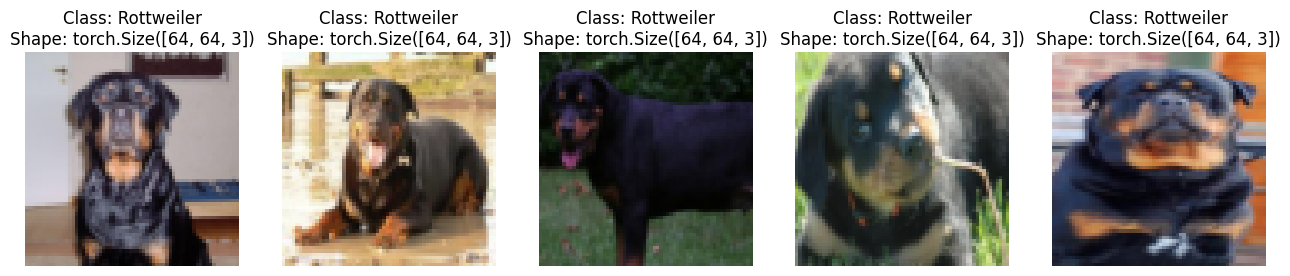

In [48]:
display_random_images(train_data,
                      n=5,
                      classes = class_names,
                      seed = None

                      )

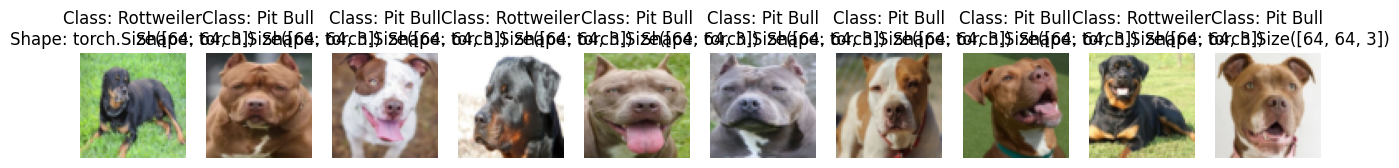

In [49]:
# from custom dataset
display_random_images(train_data_custom,
                      n=10,
                      classes = class_names,
                      seed = 42
                      )

# turn custom loaded image into dataloaders

In [50]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size =BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle=True
                                     )
test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                     batch_size =BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle=False
                                     )
train_dataloader_custom, test_dataloader_custom





(<torch.utils.data.dataloader.DataLoader at 0x7dbab242f310>,
 <torch.utils.data.dataloader.DataLoader at 0x7dbab242ece0>)

In [51]:
# get image and label from custom dataloader
image_custom, label_custom = next(iter(train_dataloader_custom))

image_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# other form of transforsm(data augmentation )

In [52]:
from torchvision import transforms
train_transforms = transforms.Compose([
  transforms.Resize(size=(224,224)),
  transforms.TrivialAugmentWide(num_magnitude_bins=5),
  transforms.ToTensor()


])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()


])

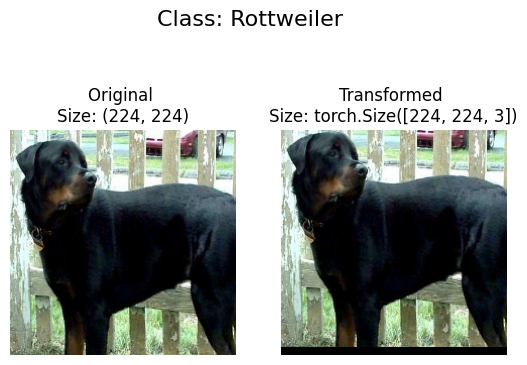

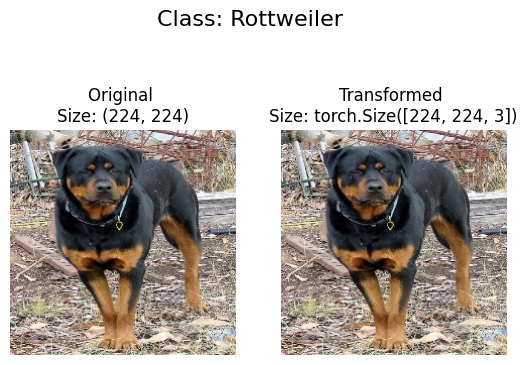

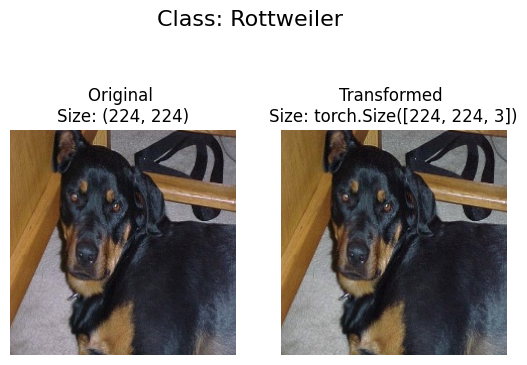

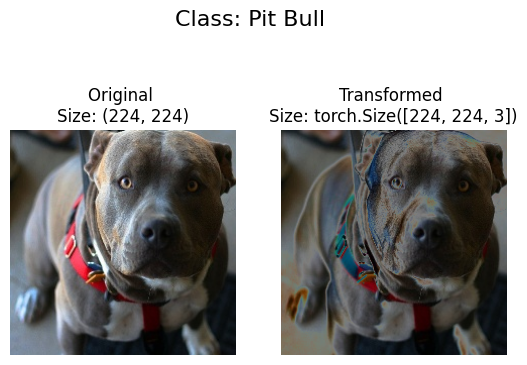

In [53]:
# get image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# plot rando images
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transforms,
                        n=4,
                        seed=None
                        )

# model 0: tinyvgg without data augmentation

# creating transforms and laoding data for model 0

In [54]:
# crate simple transforms
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])


In [55]:
# load and transformed data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform

)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform
                                        )


# turn the data set into dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


# create dataloader
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     shuffle=True,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS

                                     )

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                     shuffle=False,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS

                                     )
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7dbab1914430>,
 <torch.utils.data.dataloader.DataLoader at 0x7dbab1914220>)

# Creating a baseline MODEL0(creating tinyVGG arch )

In [56]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=0), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion



In [57]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=2, bias=True)
  )
)

# try a forward pass on a single image

In [58]:
# get single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [59]:
# try a forward pass
model_0(image_batch.to(device))

tensor([[0.0053, 0.0092],
        [0.0061, 0.0055],
        [0.0061, 0.0122],
        [0.0075, 0.0119],
        [0.0070, 0.0082],
        [0.0062, 0.0099],
        [0.0099, 0.0077],
        [0.0051, 0.0076],
        [0.0054, 0.0081],
        [0.0078, 0.0080],
        [0.0075, 0.0121],
        [0.0071, 0.0094],
        [0.0070, 0.0100],
        [0.0047, 0.0079],
        [0.0048, 0.0121],
        [0.0070, 0.0072],
        [0.0072, 0.0121],
        [0.0090, 0.0082],
        [0.0065, 0.0101],
        [0.0058, 0.0098],
        [0.0059, 0.0097],
        [0.0062, 0.0119],
        [0.0083, 0.0092],
        [0.0082, 0.0082],
        [0.0104, 0.0080],
        [0.0091, 0.0124],
        [0.0086, 0.0095],
        [0.0060, 0.0077],
        [0.0087, 0.0070],
        [0.0047, 0.0137],
        [0.0092, 0.0083],
        [0.0065, 0.0109]], device='cuda:0', grad_fn=<AddmmBackward0>)

# use torchinfo to get an idea of the shape going through the model

In [60]:
try:
  import torchinfo

except:
  !pip install torchinfo
  import torchinfo


from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])




Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 2]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

# create a train and test loop function

In [61]:
# create a train step func
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device:device
               ):
  # train mode
  model.train()

  # setup train and acc loss
  train_loss, train_acc =0,0


  # loop through the dataloader data batches
  for batch, (X, y) in enumerate(dataloader):

    # send the data to the device
    X,y = X.to(device),y.to(device)


    # forward pass
    y_pred = model(X)

    # calc the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()


    # optimizer zero grad
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # calc the acc metric
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += ((y_pred_class == y).sum().item()/len(y_pred))

  # adjust metrics to get the avg loss and acc
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss,train_acc


In [62]:
# create a test step func
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              device:device
              ):
  model.eval()

  # setup test loss, acc
  test_loss,test_acc=0,0
  # turn on infereence mode
  with torch.inference_mode():
    # loop through the dataloader batches
    for batch,(X,y) in enumerate(dataloader):

      # send data to device
      X,y=X.to(device),y.to(device)


      # forward pass
      test_pred_logits =model(X)

      # calc the loss
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()


      # calc the acc
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y).sum().item() / len(test_pred_labels))

  # adjsut metrics to get avg loss and acc
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc




# creating train func to indclude train and test step

In [63]:
from tqdm.auto import tqdm

# create a train func to take model param, loss optimizdr
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module = nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device):

  # create an empty results dict to show
  results={"train_loss":[],
           "train_acc":[],
           "test_loss":[],
           "test_acc":[]
           }
  # loop through the training and testind step for a number fofr epochs
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer =optimizer,
                                      device=device)
    test_loss, test_acc = test_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      device=device

    )

    # printout what happening
    print(f"Epoch:{epoch} | Train loss:{train_loss:.4f} | train_acc:{train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc:{test_acc:.4f}")

    # update results dict
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)


  # return filled results at the end of the epochs
  return results








train and aval model 0

In [65]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# set epochs
NUM_EPOCHS=15

# instantiate the tinyvgg
model_0 = TinyVGG(input_shape=3,#numberof color channel
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()


# train_model
model_0_results=train(model=model_0,
                      train_dataloader=train_dataloader_simple,
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS
)
end_time=timer()

print(f"Total trainig time: {end_time-start_time:.3f} seconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch:0 | Train loss:0.6840 | train_acc:0.5469 | test_loss: 0.6702 | test_acc:0.5625
Epoch:1 | Train loss:0.6467 | train_acc:0.6172 | test_loss: 0.6306 | test_acc:0.5898
Epoch:2 | Train loss:0.6299 | train_acc:0.5898 | test_loss: 0.6137 | test_acc:0.5547
Epoch:3 | Train loss:0.5656 | train_acc:0.7891 | test_loss: 0.5372 | test_acc:0.7383
Epoch:4 | Train loss:0.4696 | train_acc:0.7773 | test_loss: 0.4277 | test_acc:0.8633
Epoch:5 | Train loss:0.4267 | train_acc:0.8281 | test_loss: 0.3043 | test_acc:0.8867
Epoch:6 | Train loss:0.2883 | train_acc:0.8828 | test_loss: 0.3169 | test_acc:0.8398
Epoch:7 | Train loss:0.2975 | train_acc:0.8906 | test_loss: 0.3910 | test_acc:0.8281
Epoch:8 | Train loss:0.3297 | train_acc:0.8398 | test_loss: 0.2813 | test_acc:0.8984
Epoch:9 | Train loss:0.2858 | train_acc:0.8555 | test_loss: 0.2328 | test_acc:0.9062
Epoch:10 | Train loss:0.2489 | train_acc:0.9219 | test_loss: 0.2192 | test_acc:0.9375
Epoch:11 | Train loss:0.2644 | train_acc:0.8867 | test_loss: 0.2

In [66]:
model_0_results

{'train_loss': [0.683954544365406,
  0.6466736495494843,
  0.6299447491765022,
  0.5656317435204983,
  0.46961185336112976,
  0.4267154783010483,
  0.2882689796388149,
  0.2975054979324341,
  0.3297482542693615,
  0.285765933804214,
  0.24889928381890059,
  0.2644215915352106,
  0.21128606796264648,
  0.20791518222540617,
  0.21362779662013054],
 'train_acc': [0.546875,
  0.6171875,
  0.58984375,
  0.7890625,
  0.77734375,
  0.828125,
  0.8828125,
  0.890625,
  0.83984375,
  0.85546875,
  0.921875,
  0.88671875,
  0.93359375,
  0.921875,
  0.91015625],
 'test_loss': [0.6702333986759186,
  0.6305673494935036,
  0.6136974468827248,
  0.5372153148055077,
  0.42772434279322624,
  0.30426153540611267,
  0.3169293887913227,
  0.3909503296017647,
  0.28129335679113865,
  0.232830123975873,
  0.2192142829298973,
  0.20348577992990613,
  0.2121620113030076,
  0.1955988984555006,
  0.18537748605012894],
 'test_acc': [0.5625,
  0.58984375,
  0.5546875,
  0.73828125,
  0.86328125,
  0.88671875,
  

# plot the loss curve of model_0

In [67]:
# get the model keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [68]:
def plot_loss_curves(results:Dict[str,List[float]]):

  """plot the loss curvbe of the model0
  """
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]


  # figure out the steps of the model
  epochs = range(len(results["train_loss"]))

  # setup a plot
  plt.figure(figsize=(15,7))

  # plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,test_loss,label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()


  # plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,test_accuracy,label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();






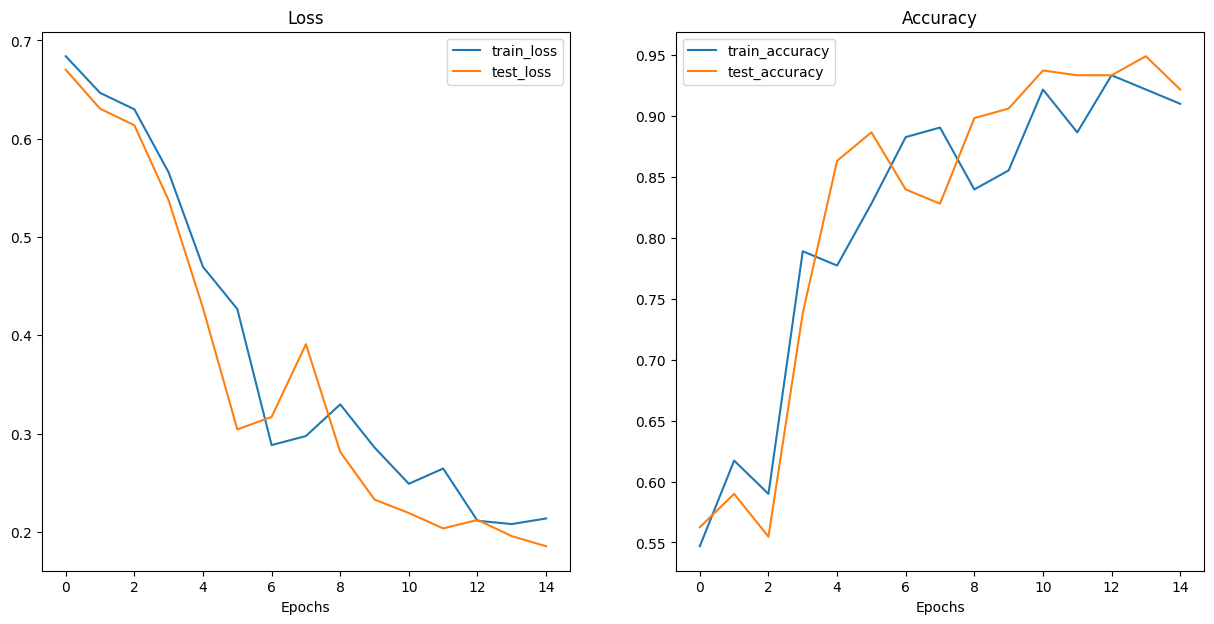

In [69]:
plot_loss_curves(model_0_results)

# what should a loss curve look.


# model 1 tinyVGG with data augmentation

# create transform with trivialaugment

In [ ]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
])

In [ ]:
train_dir

PosixPath('data/dog_breeds1/train')

## create a train and test dataloader with data augmentation

In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial

                                            )
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_trivial
                                        )

In [ ]:
# turn our dataset into dataloader
import os
from torch.utils.data import DataLoader


BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
torch.manual_seed(42)
train_dataloader_augmented= DataLoader(dataset = train_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,
                                       num_workers=NUM_WORKERS
                                       )
test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                       batch_size=BATCH_SIZE,
                                       num_workers=NUM_WORKERS,
                                       shuffle=False

)


## construct and train model 1


In [ ]:
# create model 1 send it to the device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units = 10,
                  output_shape=len(train_data_augmented.classes)

).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=2, bias=True)
  )
)

In [ ]:
 # set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5


# setup loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time=timer()

model_1_results=train(model=model_1,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_simple,
                      loss_fn=loss_fn,
                      optimizer=optimizer,
                      epochs=NUM_EPOCHS,
                      device=device
                      )

end_time=timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train loss:0.6939 | train_acc:0.4766 | test_loss: 0.6800 | test_acc:0.5625
Epoch:1 | Train loss:0.6798 | train_acc:0.5625 | test_loss: 0.6891 | test_acc:0.5352
Epoch:2 | Train loss:0.6781 | train_acc:0.5078 | test_loss: 0.6479 | test_acc:0.6680
Epoch:3 | Train loss:0.6750 | train_acc:0.6094 | test_loss: 0.6497 | test_acc:0.7500
Epoch:4 | Train loss:0.6187 | train_acc:0.6641 | test_loss: 0.6019 | test_acc:0.5977
Total training time: 5.425 seconds


# plot the loss curves for model 1

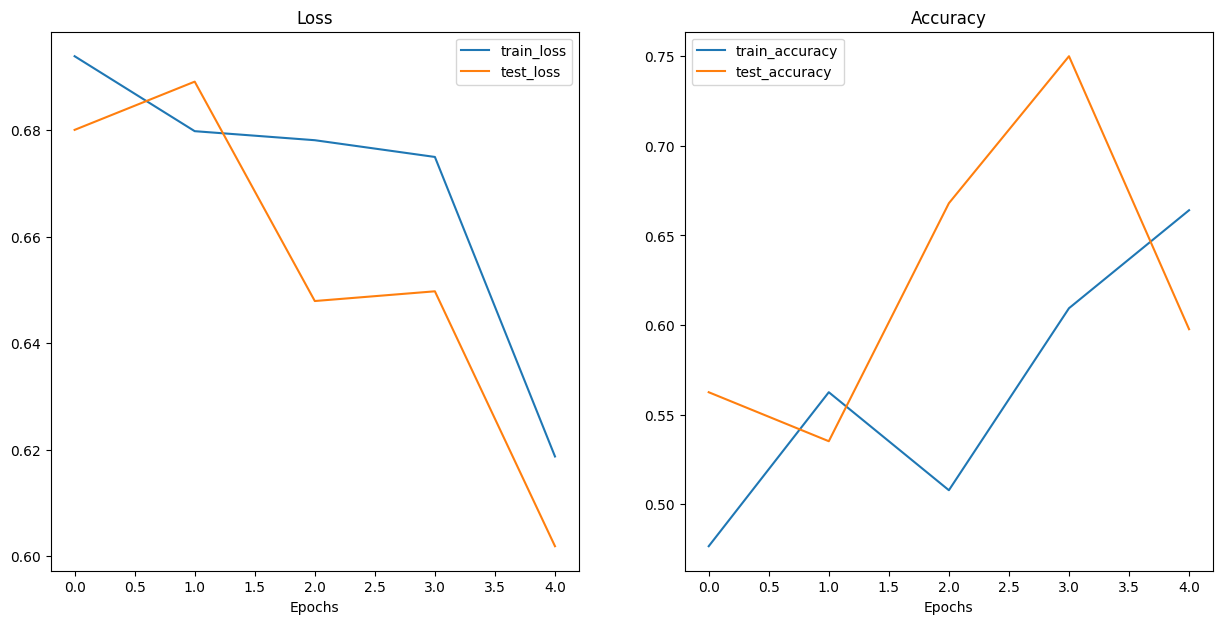

In [ ]:
plot_loss_curves(model_1_results)

# compare model results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,0.683955,0.546875,0.670233,0.562500
1,0.646674,0.617188,0.630567,0.589844
2,0.629941,0.589844,0.613679,0.554688
3,0.565646,0.789062,0.537244,0.738281
4,0.469794,0.777344,0.427931,0.863281


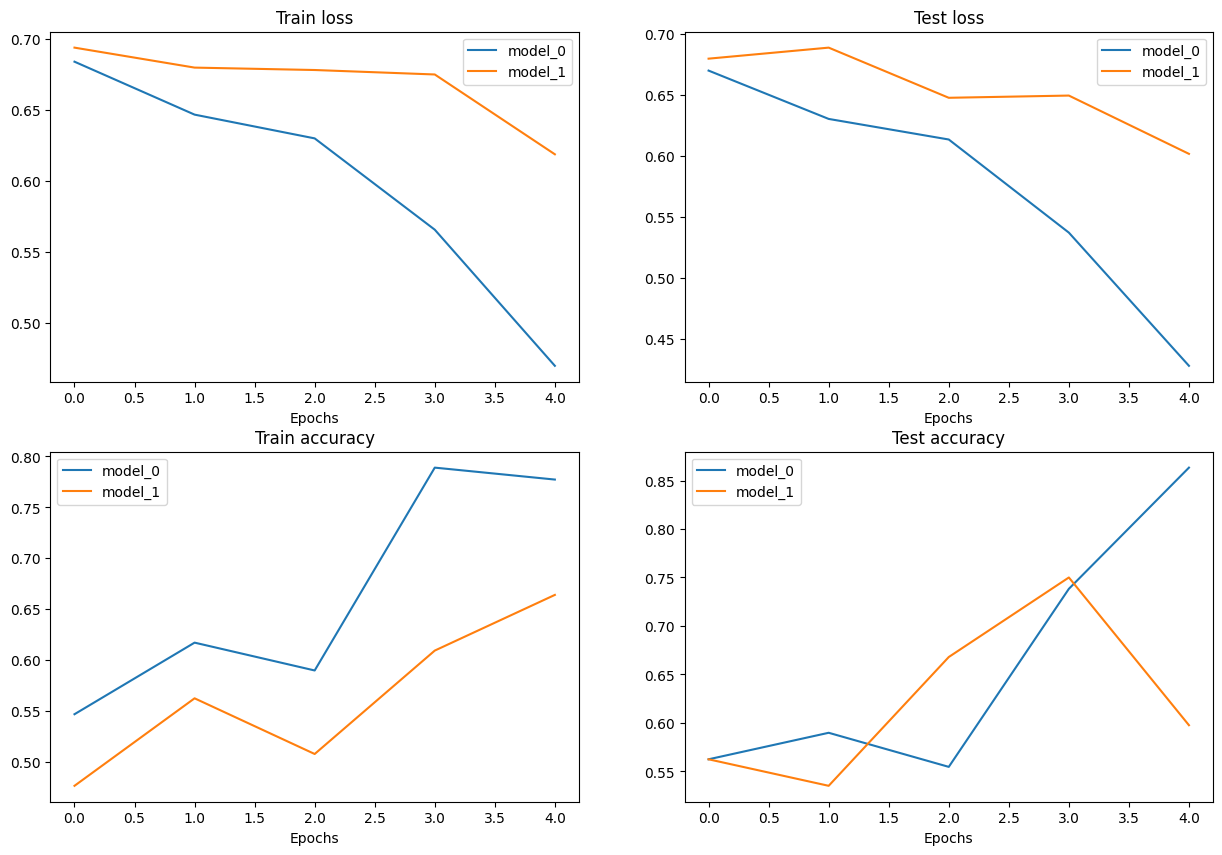

In [ ]:
# setup a plot
# import matplotlib.pylot as plt

plt.figure(figsize=(15,10))


# geththe number of epochs
epochs=range(len(model_0_df))

# plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="model_0")
plt.plot(epochs, model_1_df["train_loss"], label="model_1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend();


plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label="model_0")
plt.plot(epochs, model_1_df["test_loss"], label="model_1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend();




# plot train & test acc
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label="model_0")
plt.plot(epochs, model_1_df["train_acc"], label="model_1")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.legend();


plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="model_0")
plt.plot(epochs, model_1_df["test_acc"], label="model_1")
plt.title("Test accuracy")
plt.xlabel("Epochs")
plt.legend();





## making preediction in cutom data

In [ ]:
data_path


PosixPath('data')

In [ ]:
# making a pred on a custom image
# download a custom image
import requests

# setup custom image path
custom_image_path = data_path / "image pred9.jpeg"

# download if not available
if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:
    # when downloading from github
    request = requests.get("https://github.com/yuvrajkari7/Dog-breed-check/raw/main/image3.jpeg")
    print(f"downloading {custom_image_path}...")
    f.write(request.content)

else:
  print(f"custom image path exist skipping downloading")



downloading data/image pred9.jpeg...


# loading in a custom image with pytorch

In [ ]:
import torchvision


custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"custom image tensor: {custom_image_uint8}")
print(f"custom image shape: {custom_image_uint8.shape}")
print(f"custom image dtype: {custom_image_uint8.dtype}")

custom image tensor: tensor([[[137, 137, 136,  ..., 113, 116, 115],
         [139, 138, 137,  ..., 113, 113, 114],
         [139, 139, 138,  ..., 114, 113, 112],
         ...,
         [ 16,  15,  14,  ..., 196, 194, 191],
         [ 16,  15,  14,  ..., 197, 193, 190],
         [ 16,  15,  14,  ..., 196, 192, 188]],

        [[122, 122, 121,  ...,  97,  95,  94],
         [124, 123, 122,  ...,  97,  95,  93],
         [124, 124, 123,  ...,  97,  95,  94],
         ...,
         [ 16,  15,  14,  ..., 183, 181, 178],
         [ 16,  15,  14,  ..., 181, 177, 174],
         [ 16,  15,  14,  ..., 180, 176, 172]],

        [[101, 101, 100,  ...,  74,  74,  73],
         [103, 102, 101,  ...,  74,  73,  72],
         [103, 103, 102,  ...,  77,  73,  72],
         ...,
         [ 16,  15,  14,  ..., 166, 165, 162],
         [ 16,  15,  14,  ..., 165, 161, 158],
         [ 16,  15,  14,  ..., 164, 160, 156]]], dtype=torch.uint8)
custom image shape: torch.Size([3, 956, 640])
custom image dtype: 

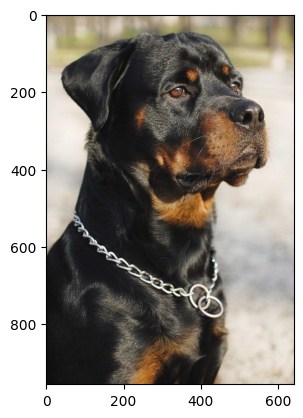

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0));

# making a pred on a custom image with a trainde pytorch model

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image.shape

torch.Size([3, 956, 640])

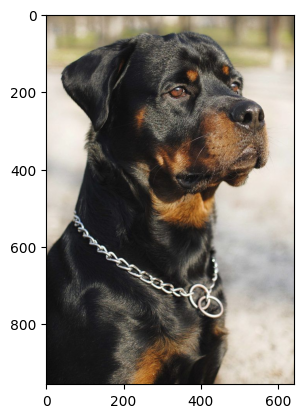

In [ ]:
plt.imshow(custom_image.permute(1,2,0))

In [ ]:
# create transform pipeline
from torchvision import transforms
custom_image_transform = transforms.Compose([

    transforms.Resize(size=(64,64))
])

custom_image_transformed = custom_image_transform(custom_image)


# ptinrtout the shape
print(f"original shape:{custom_image.shape}")
print(f"transformed shape:{custom_image_transformed.shape}")

original shape:torch.Size([3, 956, 640])
transformed shape:torch.Size([3, 64, 64])


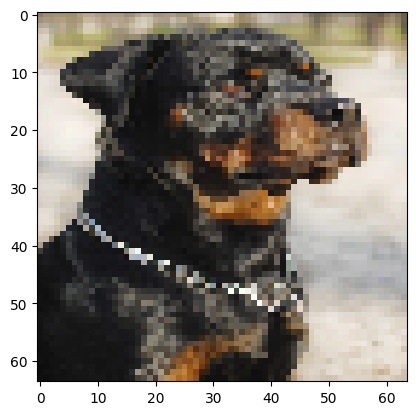

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [ ]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[ 0.0708, -0.0508]], device='cuda:0')

to make a pred on a custom image we had to:
* load the image
* turn it into tensor
* swame datatype and same shape  as the
  model is traind on and with a batch size (1,3,64,64)
* image on the sME device

In [ ]:
# convert logits into pred prob
custom_image_pred_probs = torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.5304, 0.4696]], device='cuda:0')

In [ ]:
# convert pred probs to pred labels?
custom_image_pred_labels = torch.argmax(custom_image_pred_probs,dim=1).cpu()
custom_image_pred_labels

tensor([0])

In [ ]:
class_names[custom_image_pred_labels]

'Pit Bull'

# putting custom image pred together

In [ ]:

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] =None,
                        transform=None,
                        device=device
                        ):
  target_image=torchvision.io.read_image(str(image_path)).type(torch.float32)


  # divide the image pixel value by 255 get them bw [0,1]
  target_image = target_image / 255

  if transform:
    target_image = transform(target_image)

  # make sure the model on the target devic
  model.to(device)

  # turn on the eval mode and make a pred
  model.eval()
  with torch.inference_mode():
    # add extra dim to the image i.e is the bactch dim
    target_image = target_image.unsqueeze(0)

    # make a pred on the img with a extra dim
    target_image_pred = model(target_image.to(device))


    # convert the logits
    target_image_pred_probs = torch.softmax(target_image_pred,dim=1)


    # logits to pred prob labels
    target_image_pred_label = torch.argmax(target_image_pred_probs,dim=1)

    # plot the image alongside the pred and pred prob
    plt.imshow(target_image.squeeze().permute(1,2,0))#bcoz matplot hwc
    if class_names:
      title= f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f} "

    else:
      title=f"Pred:{target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"

    plt.title(title)
    plt.axis("off")




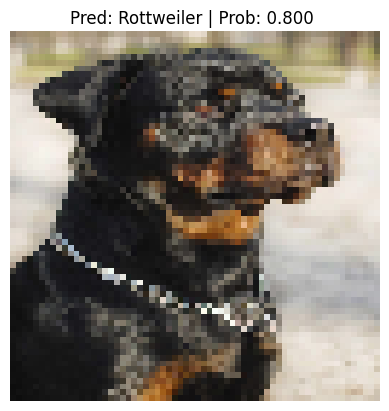

In [ ]:
# pred on our custom image
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform = custom_image_transform,
                    device=device

                    )